In [64]:
%matplotlib inline
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [65]:
df = pd.read_csv('Data4.csv',delimiter=';',encoding='ANSI')
df['Unnamed: 0']
df.rename(columns={'Unnamed: 0':'Country'}, inplace=True)


In [66]:
features = df[['Ie','Iec','Is']]
n_clusters = 4

k_means = KMeans(n_clusters=n_clusters, random_state=100).fit(features)

In [67]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

labels = k_means.labels_
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

x = features['Ie']
y = features['Iec']
z = features['Is']

colors = ['purple','red','green','blue']
for i in range(n_clusters):
    ax.scatter(x[labels == i], y[labels == i], z[labels == i], c=colors[i])
    
for centroid in centroids:
    ax.scatter(centroid[0],centroid[1],centroid[2], c='black', s=11**2)

ax.set_xlabel('Ie',fontsize=20)
ax.set_ylabel('Iec',fontsize=20)
ax.set_zlabel('Is',fontsize=20)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
best = df.loc[labels == 0]
best

,Country,ISO,UA,Cql,Ie,Iec,Is
5,Australia,AUS,Австралія,1.457611,0.791517,0.721155,0.692414
6,Austria,AUT,Австрія,1.393557,0.771155,0.640078,0.698254
11,Belgium,BEL,Бельґія,1.287539,0.696510,0.610619,0.652020
23,Canada,CAN,Канада,1.405515,0.764216,0.737761,0.637167
26,Chile,CHL,Чілі,1.325461,0.683625,0.676489,0.640437
34,Czech Republic,CZE,Чехія,1.305630,0.749434,0.645762,0.612366
35,Denmark,DNK,Данія,1.441151,0.803673,0.679001,0.698137
40,Estonia,EST,Естонія,1.326366,0.798270,0.661003,0.594485
43,Finland,FIN,Фінляндія,1.397621,0.822361,0.634745,0.671395
44,France,FRA,Франція,1.309040,0.794505,0.593240,0.634039


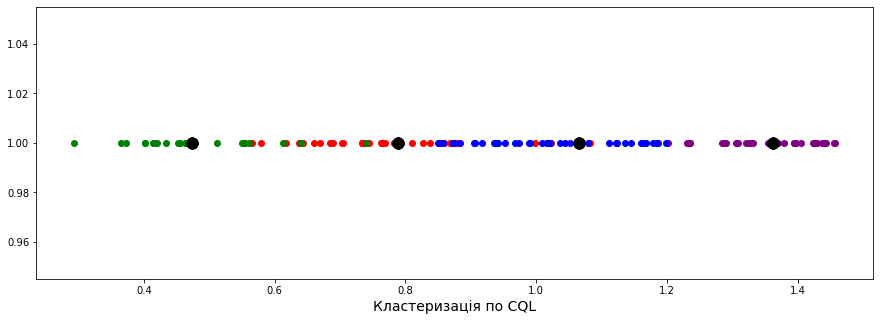

In [37]:
%matplotlib inline
features = df['Cql']

k_means = KMeans(n_clusters=n_clusters, random_state=100).fit(features.to_numpy().reshape(-1,1))
cql_labels = k_means.labels_
cql_centroids = k_means.cluster_centers_
n = np.count_nonzero(cql_labels - labels)
#print(f'В різні класи потрапило {n} країн')

fig, axes = plt.subplots(1,1,figsize=(15,5))
colors = ['purple','red','green','blue']
for i in range(n_clusters):
    axes.scatter(features[labels == i],[1]*len(features[labels == i]), c=colors[i])
    axes.scatter(cql_centroids,[1]*len(cql_centroids), c='black', s=11**2)
axes.set_xlabel('Кластеризація по CQL',fontsize=14)
plt.show()

In [38]:
ie_iec_is_labels = labels
for i in range(n_clusters):
    print(f'В кластері №{i+1} при кластеризації по IE, IEC, IS кількість країн = {np.count_nonzero(ie_iec_is_labels == i)}')
print('\n')
for i in range(n_clusters):
    print(f'В кластері №{i+1} при кластеризації по CQL кількість країн = {np.count_nonzero(cql_labels == i)}')

В кластері №1 при кластеризації по IE, IEC, IS кількість країн = 30
В кластері №2 при кластеризації по IE, IEC, IS кількість країн = 34
В кластері №3 при кластеризації по IE, IEC, IS кількість країн = 28
В кластері №4 при кластеризації по IE, IEC, IS кількість країн = 40


В кластері №1 при кластеризації по CQL кількість країн = 40
В кластері №2 при кластеризації по CQL кількість країн = 35
В кластері №3 при кластеризації по CQL кількість країн = 29
В кластері №4 при кластеризації по CQL кількість країн = 28


In [39]:
df.loc[ie_iec_is_labels == 3]

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498
7,Azerbaijan,AZE,Азербайджан,0.917249,0.748253,0.473428,0.425164
10,Belarus,BLR,Білорусія,0.938381,0.726632,0.325924,0.534345
12,Belize,BLZ,Беліз,0.905604,0.628042,0.416424,0.533746
17,Botswana,BWA,Ботсвана,1.036815,0.570390,0.585593,0.530271
18,Brazil,BRA,Бразілія,0.935369,0.703757,0.442173,0.504225
19,Bulgaria,BGR,Болгарія,1.135627,0.734293,0.555902,0.554503
28,Colombia,COL,Колумбія,1.052444,0.672805,0.617207,0.458186


In [40]:
df.loc[cql_labels == 0]

,Country,ISO,UA,Cql,Ie,Iec,Is
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
7,Azerbaijan,AZE,Азербайджан,0.917249,0.748253,0.473428,0.425164
12,Belize,BLZ,Беліз,0.905604,0.628042,0.416424,0.533746
14,Bhutan,BTN,Бутан,0.810334,0.467661,0.427754,0.532971
15,Bolivia. Plurinational State of,BOL,Болівія. Багатонаціональна Держава,0.762794,0.577909,0.319822,0.496527
16,Bosnia and Herzegovina,BIH,Боснія і Герцеґовина,0.782466,0.423962,0.436534,0.526861
27,China,CHN,Китай,0.882542,0.498997,0.533856,0.493696
36,Dominican Republic,DOM,Домініканська Республіка,0.850324,0.658701,0.463127,0.443709
37,Ecuador,ECU,Еквадор,0.733954,0.529872,0.337091,0.497026


### Додаткове завдання

#### Визначити, який регіон домінує в кластерах по ВВП на душу населення та щільності населення

In [41]:
df = pd.read_csv('Data2.csv', delimiter=';', encoding='ANSI')
df.head()

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


In [43]:
df.describe()

,GDP per capita,Populatiion,CO2 emission,Area
count,190.000000,2.160000e+02,2.050000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.126082e+05
std,18038.981506,1.347600e+08,8.335357e+05,1.829940e+06
min,285.727442,1.109700e+04,1.100100e+01,-6.765900e+05
25%,2031.779671,7.900265e+05,1.334788e+03,1.045000e+04
50%,5235.308547,6.221590e+06,9.108828e+03,9.222500e+04
75%,16003.299818,2.350337e+07,5.986378e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [44]:
df.loc[df['Area'] < 0,'Area'] *= -1
df.loc[df['Populatiion'] < 0,'Populatiion'] *= -1
df.loc[df['CO2 emission'] < 0,'CO2 emission'] *= -1
df.loc[df['GDP per capita'] < 0,'GDP per capita'] *= -1
df.fillna(df.mean(), inplace=True)

df['Density'] = df['Populatiion'] / df['Area']


In [45]:
features = df[['GDP per capita','Density']]

sse = []

n = range(1,11)
for i in n:
    k_means = KMeans(n_clusters=i).fit(features)
    sse.append(k_means.inertia_)


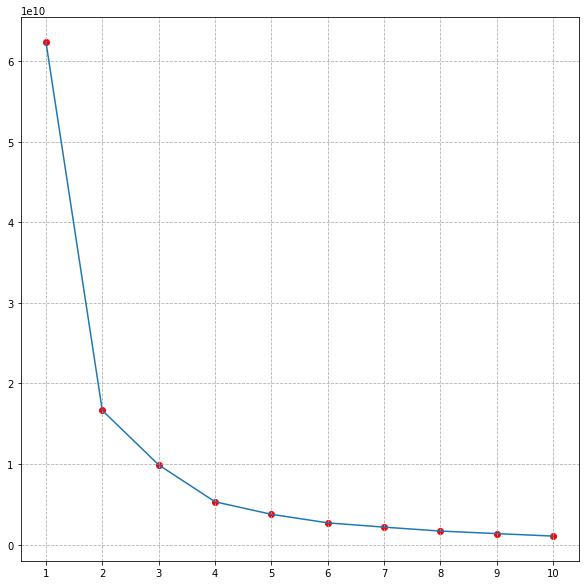

In [46]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(n,sse)
ax.scatter(n,sse, c='r')
ax.set_xticks(n)
ax.grid(True,linestyle='--')
plt.show()

Оберемо 4 кластери за методом Elbow

In [63]:
n_clusters = 4
k_means = KMeans(n_clusters=n_clusters).fit(features)
labels = k_means.labels_
regiones = df['Region'].unique()

regiones_count = {'South Asia':0,
            'Europe & Central Asia':0,
            'Middle East & North Africa':0,
            'East Asia & Pacific':0,
            'Sub-Saharan Africa':0,
            'Latin America & Caribbean':0,
            'North America':0}

for j in range(n_clusters):
    regiones_c = regiones_count.copy()
    for i in range(len(labels)):
        if labels[i] == j:    
            regiones_c[df.iloc[i]['Region']] += df.iloc[i]['GDP per capita'] * df.iloc[i]['Density']
    top_region = max(regiones_c, key=regiones_c.get)
    print(f'Домінуючий регіон в кластері №{j+1} по ВВП та щільності населення : {top_region}')
    


Домінуючий регіон в кластері №1 по ВВП та щільності населення : East Asia & Pacific
Домінуючий регіон в кластері №2 по ВВП та щільності населення : East Asia & Pacific
Домінуючий регіон в кластері №3 по ВВП та щільності населення : Europe & Central Asia
Домінуючий регіон в кластері №4 по ВВП та щільності населення : East Asia & Pacific


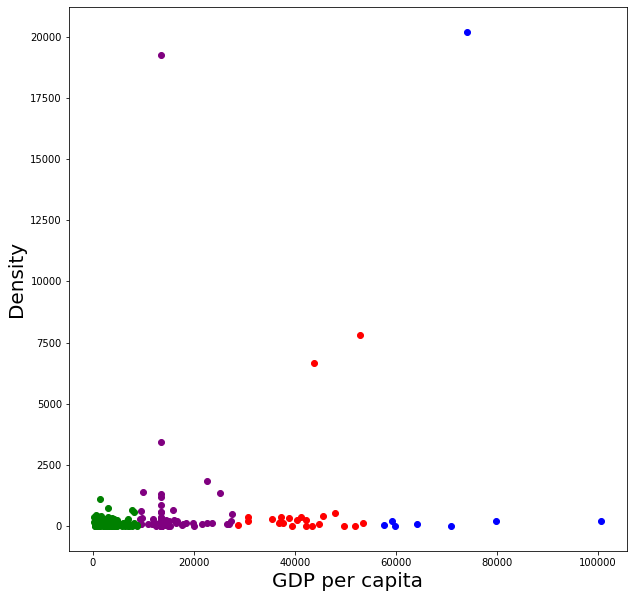

In [48]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
x = features['GDP per capita']
y = features['Density']
colors = ['purple','red','green','blue']
for i in range(n_clusters):
    axes.scatter(x[labels == i],y[labels == i], c=colors[i])

axes.set_xlabel('GDP per capita',fontsize=20)
axes.set_ylabel('Density',fontsize=20)
plt.show()

#### Вивести частотні гістограми всіх показників файла Data2.csv, використовуючи цикл

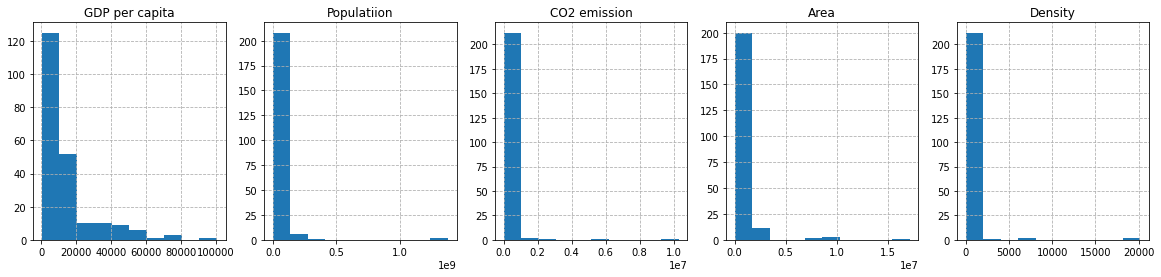

In [49]:
names = ['GDP per capita','Populatiion','CO2 emission','Area','Density']
fig, axes = plt.subplots(1,5,figsize=(20,4))
for i in range (len(axes)):
    axes[i].hist(df[names[i]])
    axes[i].set_title(names[i])
    axes[i].grid(True, linestyle='--')

#### Cтворити функцію, яка на вхід отримує два набори даних, перевіряє чи є лінійна залежність та виводить True чи False (будемо розуміти під «є лінійна залежність», якщо коефіцієнт кореляції по модулю більше 0,8)

In [50]:
def isCorr(data1, data2):
    """
    data1: numpy ndarray or pandas dataframe
    data2: numpy ndarray or pandas dataframe
    
    return: True if |corr coef| > 0.8 else False 
    """
    try:
        corr_coef = np.corrcoef(data1,data2)
        if np.abs(corr_coef[0,1]) > 0.8:
            return True
        else:
            return False 
    except:
        print('Ooops! ')

isCorr(df['GDP per capita'],df['Populatiion'])

False